In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  


Форма массива признаков: (150, 4)
Имена признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


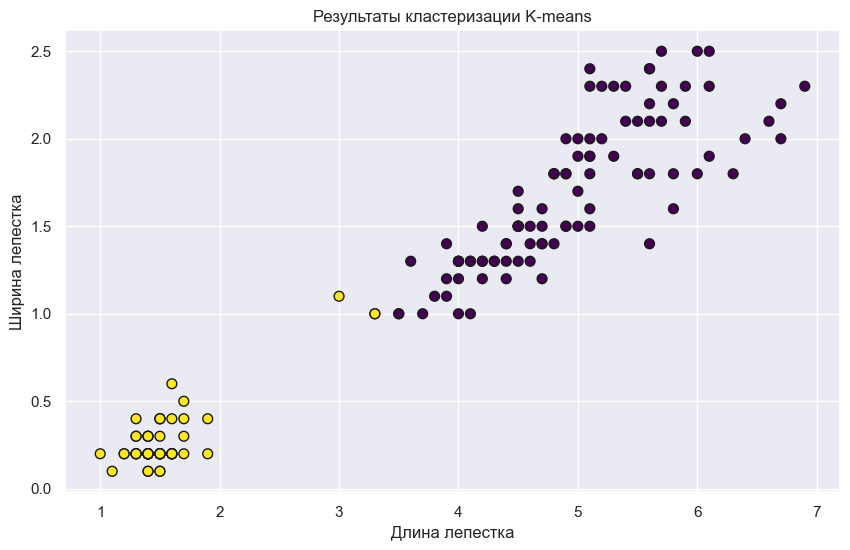

In [4]:

iris = load_iris()
X = iris.data
print("Форма массива признаков:", X.shape)
print("Имена признаков:", iris.feature_names)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_clusters = kmeans.labels_  


plt.figure(figsize=(10, 6))
plt.scatter(X[:, 2], X[:, 3], c=y_clusters, cmap='viridis', edgecolor='k', s=50)
plt.title("Результаты кластеризации K-means")
plt.xlabel("Длина лепестка")
plt.ylabel("Ширина лепестка")
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_clusters, test_size=0.3, random_state=42)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (105, 4)
Размер тестовой выборки: (45, 4)


In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("Коэффициенты модели:", model.coef_)
print("Перехват (свободный член):", model.intercept_)


Коэффициенты модели: [[-1.06387826  0.18725229 -2.15036574 -0.65939407]]
Перехват (свободный член): [12.39169488]


In [9]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Точность модели:", accuracy)
print("Матрица ошибок:\n", conf_matrix)


Точность модели: 1.0
Матрица ошибок:
 [[26  0]
 [ 0 19]]


Точность модели: 1.0
Матрица ошибок:
 [[26  0]
 [ 0 19]]


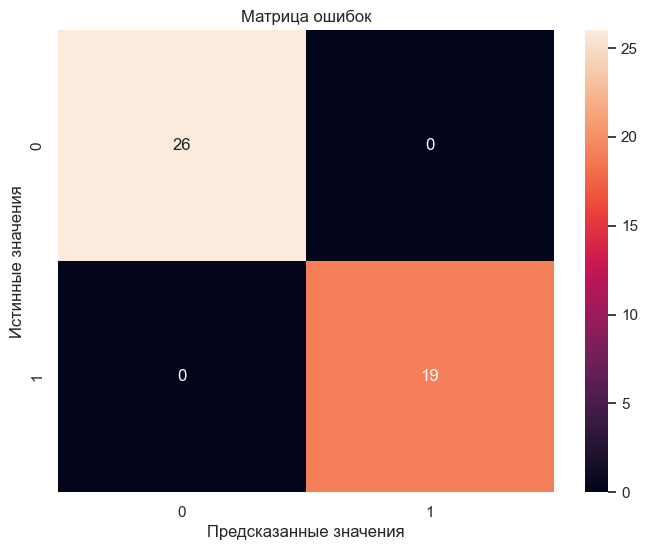

In [8]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Точность модели:", accuracy)
print("Матрица ошибок:\n", conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Матрица ошибок")
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()


In [19]:
def predict_cluster_and_stem_length(petal_length, kmeans_model, logistic_model, X_train):
    petal_width_mean = np.mean(X_train[:, 3])
    sepal_length_mean = np.mean(X_train[:, 0])
    sepal_width_mean = np.mean(X_train[:, 1])
    

    input_features = np.array([[sepal_length_mean, sepal_width_mean, petal_length, petal_width_mean]])
    

    cluster = kmeans_model.predict(input_features)
    

    linear_model = LinearRegression()
    linear_model.fit(X_train[:, 2:3], X_train[:, 0])  
    
 
    sepal_length_predicted = linear_model.predict([[petal_length]])
    
    return cluster[0], sepal_length_predicted[0]


cluster, sepal_length = predict_cluster_and_stem_length(8, kmeans, model, X_train)
print("Предсказанный кластер:", cluster)
print("Предсказанная длина стебля:", sepal_length)


Предсказанный кластер: 0
Предсказанная длина стебля: 7.575733450692038
